Nama : Fajar G 1151700010

In [0]:
# import library yang dibutuhkan

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
!wget -O file.csv https://raw.githubusercontent.com/solehT10/Data-Gizi-Buruk/master/Kel%20Batuceper%20file.csv

--2019-11-11 07:23:20--  https://raw.githubusercontent.com/solehT10/Data-Gizi-Buruk/master/Kel%20Batuceper%20file.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18669 (18K) [text/plain]
Saving to: ‘file.csv’

file.csv            100%[===================>]  18.23K  --.-KB/s    in 0.01s   

2019-11-11 07:23:20 (1.44 MB/s) - ‘file.csv’ saved [18669/18669]



In [4]:
churn_df = pd.read_csv("file.csv")
churn_df.head()

,No,jenis kelamin,BBTB,BBU,TBU,Status gizi,Unnamed: 6
0,1,L,0.35,0.65,-0.27,1,NaN
1,2,L,0.41,1.19,-0.75,1,NaN
2,3,L,-0.02,-0.38,0.31,1,NaN
3,4,L,-0.43,-0.64,0.04,1,NaN
4,5,L,-0.84,1.11,-2.07,1,NaN


In [6]:
churn_df = churn_df[['BBTB', 'BBU', 'TBU', 'Status gizi']]
churn_df['Status gizi'] = churn_df['Status gizi'].astype('int')
churn_df.head()

,BBTB,BBU,TBU,Status gizi
0,0.35,0.65,-0.27,1
1,0.41,1.19,-0.75,1
2,-0.02,-0.38,0.31,1
3,-0.43,-0.64,0.04,1
4,-0.84,1.11,-2.07,1


In [8]:
X = np.asarray(churn_df[['BBTB', 'BBU', 'TBU']])
X[0:5]

array([[ 0.35,  0.65, -0.27],
       [ 0.41,  1.19, -0.75],
       [-0.02, -0.38,  0.31],
       [-0.43, -0.64,  0.04],
       [-0.84,  1.11, -2.07]])

In [9]:
y = np.asarray(churn_df['Status gizi'])
y [0:5]

array([1, 1, 1, 1, 1])

In [10]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.25578886,  0.51624811, -0.18403113],
       [ 0.27852184,  0.61812331, -0.3058653 ],
       [ 0.11560214,  0.32193062, -0.03681483],
       [-0.03973991,  0.2728796 , -0.10534655],
       [-0.19508195,  0.60303069, -0.64090929]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (566, 3) (566,)
Test set: (142, 3) (142,)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.67338079, 0.32661921],
       [0.90507916, 0.09492084],
       [0.72271641, 0.27728359],
       [0.27543863, 0.72456137],
       [0.7802583 , 0.2197417 ],
       [0.63368126, 0.36631874],
       [0.66155393, 0.33844607],
       [0.60007768, 0.39992232],
       [0.69378872, 0.30621128],
       [0.56059908, 0.43940092],
       [0.69535118, 0.30464882],
       [0.65252015, 0.34747985],
       [0.71227677, 0.28772323],
       [0.69446499, 0.30553501],
       [0.62486739, 0.37513261],
       [0.62773284, 0.37226716],
       [0.67007961, 0.32992039],
       [0.75334134, 0.24665866],
       [0.71179783, 0.28820217],
       [0.7496483 , 0.2503517 ],
       [0.71911737, 0.28088263],
       [0.65381696, 0.34618304],
       [0.58176088, 0.41823912],
       [0.59051922, 0.40948078],
       [0.51109084, 0.48890916],
       [0.71428926, 0.28571074],
       [0.39426825, 0.60573175],
       [0.62781336, 0.37218664],
       [0.65086829, 0.34913171],
       [0.57555489, 0.42444511],
       [0.

In [15]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.852112676056338

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[104   0]
 [  0   0]]


Confusion matrix, without normalization
[[104   0]
 [  0   0]]


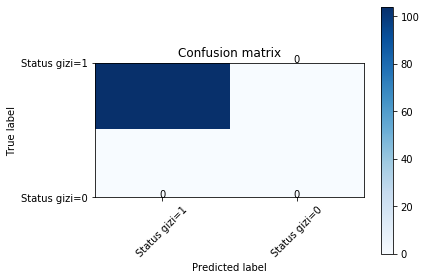

In [18]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Status gizi=1','Status gizi=0'],normalize= False,  title='Confusion matrix')

In [19]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91       104
           2       1.00      0.45      0.62        38

    accuracy                           0.85       142
   macro avg       0.92      0.72      0.76       142
weighted avg       0.88      0.85      0.83       142



In [20]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5071604816894179